In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv('/Users/markraeven17/COMPSCI/DataScienceProject/crop_yield.csv')
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)
df.head()

Summary Statistics:
           Rainfall_mm  Temperature_Celsius  Days_to_Harvest  \
count  1000000.000000       1000000.000000   1000000.000000   
mean       549.981901            27.504965       104.495025   
std        259.851320             7.220608        25.953412   
min        100.000896            15.000034        60.000000   
25%        324.891090            21.254502        82.000000   
50%        550.124061            27.507365       104.000000   
75%        774.738520            33.753267       127.000000   
max        999.998098            39.999997       149.000000   

       Yield_tons_per_hectare  
count          1000000.000000  
mean                 4.649472  
std                  1.696572  
min                 -1.147613  
25%                  3.417637  
50%                  4.651808  
75%                  5.879200  
max                  9.963372  


,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [ ]:
mean_yield = df['Yield_tons_per_hectare'].mean()
median_yield = df['Yield_tons_per_hectare'].median()
std_dev_price = df["Yield_tons_per_hectare"].std()


# Display the results
print(f"Mean Crop Yield: {mean_yield:.2f} tons per hectare")
print(f"Median Crop Yield: {median_yield:.2f} tons per hectare")
print(f"Standard Deviation: {std_dev_price:.2f}")

Mean Crop Yield: 4.65 tons per hectare
Median Crop Yield: 4.65 tons per hectare
Standard Deviation: 1.70


In [ ]:
plt.figure(figsize=(40, 24))
sns.histplot(df['Yield_tons_per_hectare'], bins=10, kde=True, color='green')
plt.title('Histogram of Crop Yield with Density Plot')
plt.xlabel('Crop Yield (tons per hectare)')
plt.ylabel('Frequency')
plt.show()

NameError: name 'plt' is not defined

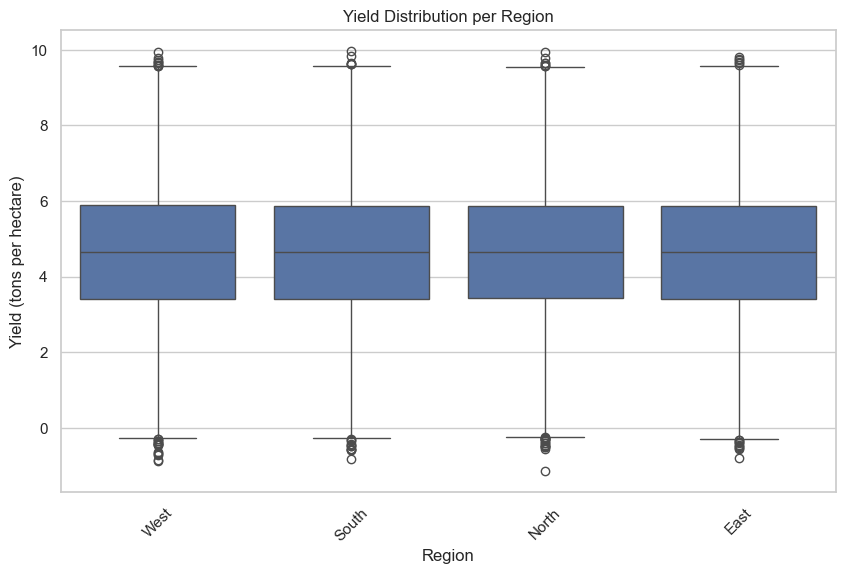

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the box plot
sns.boxplot(x='Region', y='Yield_tons_per_hectare', data=df)

# Add title and labels
plt.title('Yield Distribution per Region')
plt.xlabel('Region')
plt.ylabel('Yield (tons per hectare)')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

/var/folders/b7/rrrjhb5d50vcq_64lyq_dvb00000gn/T/ipykernel_1947/1370433439.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crop', y='Yield_tons_per_hectare', data=avg_yield_by_weather, palette='coolwarm')


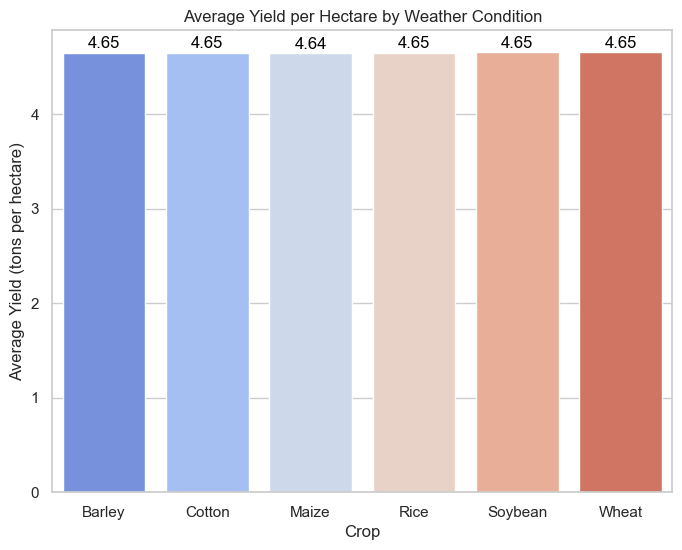

In [ ]:
# Calculate the average yield for each weather condition
avg_yield_by_weather = df.groupby('Crop')['Yield_tons_per_hectare'].mean().reset_index()

# Plot the average yield for each weather condition
plt.figure(figsize=(8, 6))
sns.barplot(x='Crop', y='Yield_tons_per_hectare', data=avg_yield_by_weather, palette='coolwarm')

# Add title and labels
plt.title('Average Yield per Hectare by Weather Condition')
plt.xlabel('Crop')
plt.ylabel('Average Yield (tons per hectare)')

# Annotate each bar with the average yield value
for index, row in avg_yield_by_weather.iterrows():
    plt.text(
        x=index, 
        y=row['Yield_tons_per_hectare'] + 0.05,  # Adjust the y position slightly above the bar
        s=f"{row['Yield_tons_per_hectare']:.2f}",  # Format to 2 decimal places
        ha='center', 
        color='black'
    )

plt.show()

/var/folders/b7/rrrjhb5d50vcq_64lyq_dvb00000gn/T/ipykernel_1947/3700379163.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weather_Condition', y='Yield_tons_per_hectare', data=avg_yield_by_weather, palette='coolwarm')


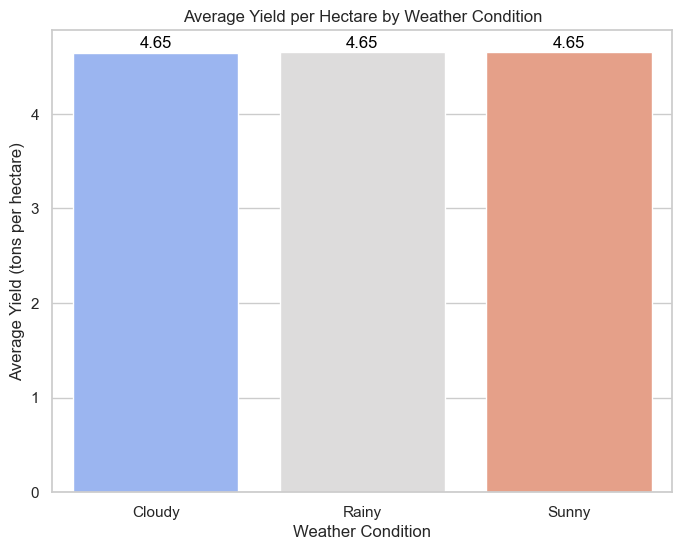

In [ ]:
# Calculate the average yield for each weather condition
avg_yield_by_weather = df.groupby('Weather_Condition')['Yield_tons_per_hectare'].mean().reset_index()

# Plot the average yield for each weather condition
plt.figure(figsize=(8, 6))
sns.barplot(x='Weather_Condition', y='Yield_tons_per_hectare', data=avg_yield_by_weather, palette='coolwarm')

# Add title and labels
plt.title('Average Yield per Hectare by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Yield (tons per hectare)')

# Annotate each bar with the average yield value
for index, row in avg_yield_by_weather.iterrows():
    plt.text(
        x=index, 
        y=row['Yield_tons_per_hectare'] + 0.05,  # Adjust the y position slightly above the bar
        s=f"{row['Yield_tons_per_hectare']:.2f}",  # Format to 2 decimal places
        ha='center', 
        color='black'
    )

plt.show()


/var/folders/b7/rrrjhb5d50vcq_64lyq_dvb00000gn/T/ipykernel_1947/4007400698.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Rainfall_mm', y='Yield_tons_per_hectare', data=df, palette='coolwarm')


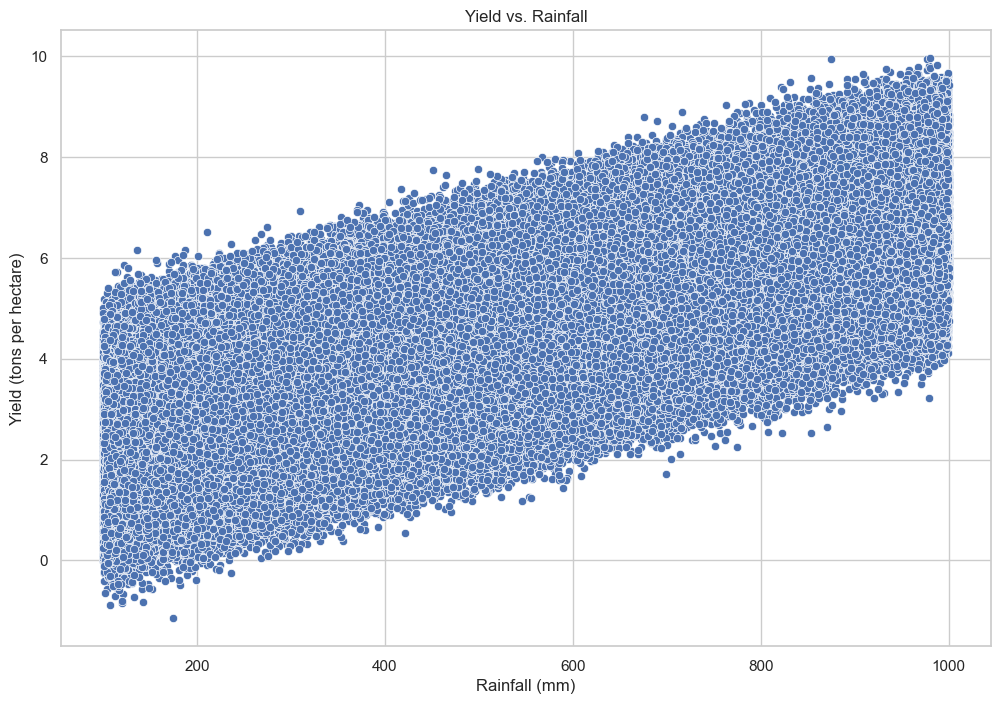

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Rainfall_mm', y='Yield_tons_per_hectare', data=df, palette='coolwarm')
plt.title('Yield vs. Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (tons per hectare)')
plt.show()


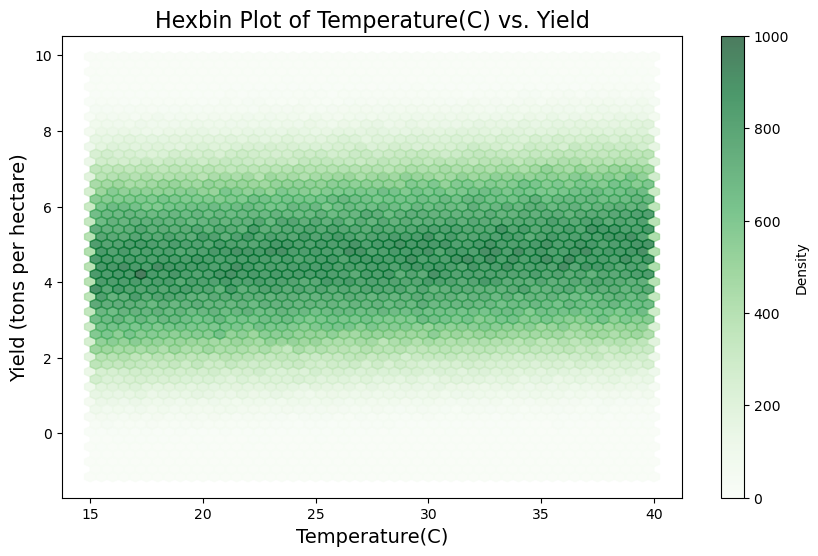

In [ ]:
plt.figure(figsize=(10, 6))
plt.hexbin(df["Temperature_Celsius"], df["Yield_tons_per_hectare"], gridsize=50, cmap='Greens', alpha=0.7)
plt.title("Hexbin Plot of Temperature(C) vs. Yield", fontsize=16)
plt.xlabel("Temperature(C)", fontsize=14)
plt.ylabel("Yield (tons per hectare)", fontsize=14)

# Add a color bar to show density
plt.colorbar(label='Density')
plt.show()

/var/folders/b7/rrrjhb5d50vcq_64lyq_dvb00000gn/T/ipykernel_1947/2150156958.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fertilizer_Used', y='Yield_tons_per_hectare', data=df, palette='Set2')


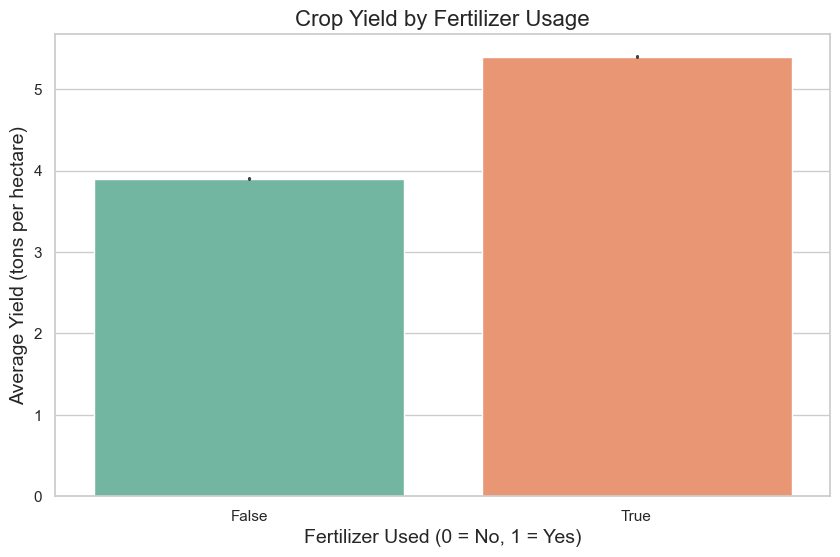

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains 'Fertilizer_Used' and 'Yield_tons_per_hectare' columns
# Create a barplot to compare fertilizer usage (0 = No, 1 = Yes) against the average crop yield
plt.figure(figsize=(10, 6))
sns.barplot(x='Fertilizer_Used', y='Yield_tons_per_hectare', data=df, palette='Set2')

# Add titles and labels
plt.title("Crop Yield by Fertilizer Usage", fontsize=16)
plt.xlabel("Fertilizer Used (0 = No, 1 = Yes)", fontsize=14)
plt.ylabel("Average Yield (tons per hectare)", fontsize=14)

# Display the plot
plt.show()